In [1]:
%load_ext autoreload
%autoreload 2

from context import uncertify

In [2]:
import logging
from uncertify.log import setup_logging
setup_logging()
LOG = logging.getLogger(__name__)

# Matplotlib DEBUG logging spits out a whole bunch of crap
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

In [3]:
from pathlib import Path

import h5py

from uncertify.data.hdf5 import print_dataset_information
from uncertify.visualization.datasets import plot_samples
from uncertify.data.dataloaders import dataloader_factory, DatasetType
from uncertify.visualization.datasets import  plot_camcan_batches, plot_brats_batches
from uncertify.visualization.datasets import plot_patient_histograms
from uncertify.common import DATA_DIR_PATH

2020-11-30 16:13:12,232 : h5py._conv   : DEBUG      Creating converter from 7 to 5
2020-11-30 16:13:12,236 : h5py._conv   : DEBUG      Creating converter from 5 to 7
2020-11-30 16:13:12,236 : h5py._conv   : DEBUG      Creating converter from 7 to 5
2020-11-30 16:13:12,237 : h5py._conv   : DEBUG      Creating converter from 5 to 7


# Explore HDF5 dataset
Ability to plot raw data directly out of HDF5 file.

/home/juniors/code/uncertify/data/processed/camcan_train_t2_hm_std_bv3.5_xe.hdf5 does exist!
/media/juniors/2TB_internal_HD/datasets/processed/brats17_t2_bc_std_bv3.5_l10.hdf5 does exist!

 --- camcan_train_t2_hm_std_bv3.5_xe.hdf5 ---
<HDF5 dataset "mask": shape (76141, 40000), type "<f8">
<HDF5 dataset "scan": shape (76141, 40000), type "<f8">

 --- brats17_t2_bc_std_bv3.5_l10.hdf5 ---
<HDF5 dataset "mask": shape (1550, 40000), type "<f8">
<HDF5 dataset "scan": shape (1550, 40000), type "<f8">
<HDF5 dataset "seg": shape (1550, 40000), type "<f8">
Metadata:
	background_value              : b'-3.5'
	dataset_name                  : b'brats17'
	dataset_root_path             : b'/media/juniors/2TB_internal_HD/datasets/raw/BraTS17/training'
	do_bias_correction            : b'true'
	do_create_dataset             : b'true'
	do_histogram_matching         : b'false'
	do_normalization              : b'true'
	do_pre_processing             : b'true'
	exclude_empty_slices          : b'false'
	force

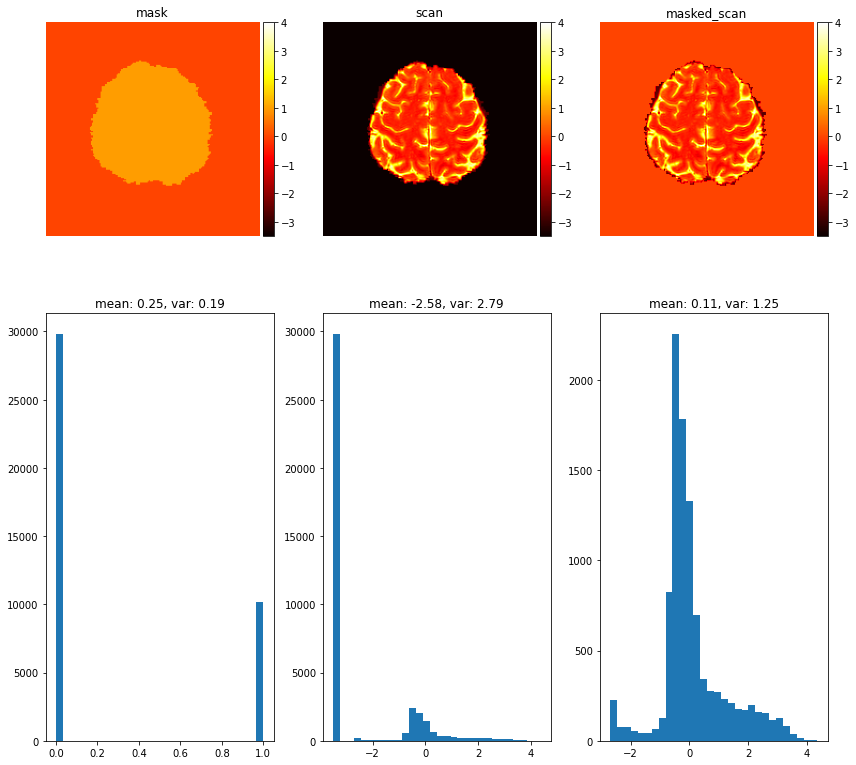

DATSET: brats17_t2_bc_std_bv3.5_l10.hdf5
mask           : min/max: 0.00/0.00, mean: 0.00, variance: 0.00
scan           : min/max: -3.50/-3.50, mean: -3.50, variance: 0.00
seg            : min/max: 0.00/0.00, mean: 0.00, variance: 0.00
Found sample with empty mask. No statistics available.


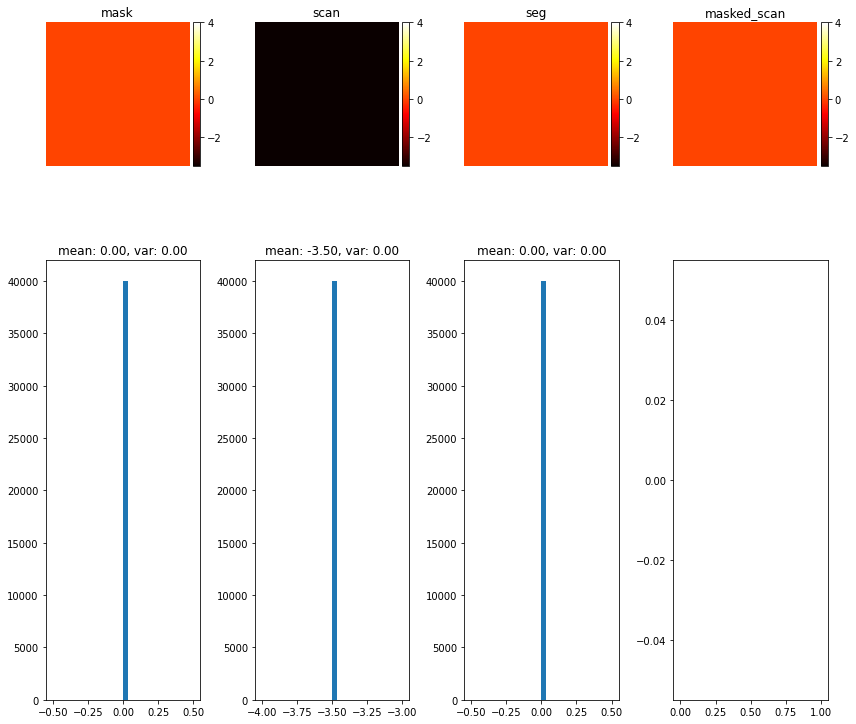

In [4]:
PROCESSED_DIR_PATH = DATA_DIR_PATH / 'processed'

PROCESSED_DIR_PATH = Path('/media/juniors/2TB_internal_HD/datasets/processed/')
# PROCESSED_DIR_PATH = DATA_DIR_PATH / 'processed'

brats_t2_path = PROCESSED_DIR_PATH / 'brats17_t2_bc_std_bv3.5_l10.hdf5'
brats_t2_hm_path = PROCESSED_DIR_PATH / 'brats17_t2_hm_bc_std_bv-3.5.hdf5'
brats_t1_path = PROCESSED_DIR_PATH / 'brats17_t1_bc_std_bv3.5_l10.hdf5'
brats_t1_hm_path = PROCESSED_DIR_PATH / 'brats17_t1_hm_bc_std_bv-3.5.hdf5'

camcan_train_path =  PROCESSED_DIR_PATH / 'camcan_train_t2_hm_std_bv3.5_xe.hdf5'
camcan_train_path = Path('/home/juniors/code/uncertify/data/processed/camcan_train_t2_hm_std_bv3.5_xe.hdf5')
camcan_val_path =  PROCESSED_DIR_PATH / 'camcan_val_t2_hm_std_bv3.5_xe.hdf5'

# Expand when needed
dataset_paths = [
    camcan_train_path,
    #camcan_val_path,
    brats_t2_path,
    #brats_t2_hm_path,
    #brats_t1_path,
    #brats_t1_hm_path
]

print_dataset_information(dataset_paths=dataset_paths)
for path in dataset_paths:
    plot_n_slices = 1
    print(f'DATSET: {path.name}')
    plot_samples(h5py.File(path, 'r'), n_samples=plot_n_slices, cmap='hot', dataset_length=187, vmin=-3.5, vmax=4)

# Explore Dataset using Dataset and Dataloader in PyTorch

### Visualize CamCAN Training Data

2020-11-30 16:19:10,787 : uncertify.visualization.datasets : INFO       Plotting CamCAN Dataset [scan only]


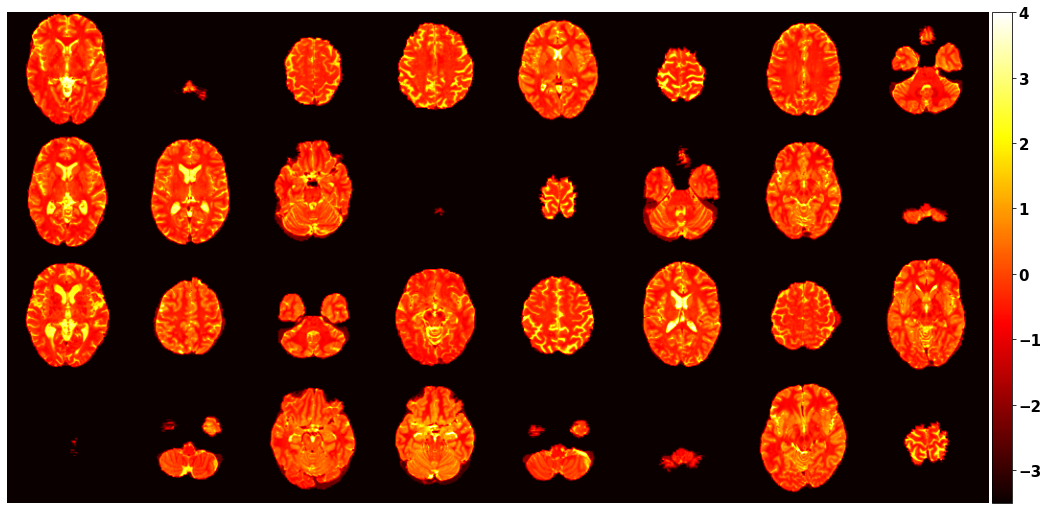

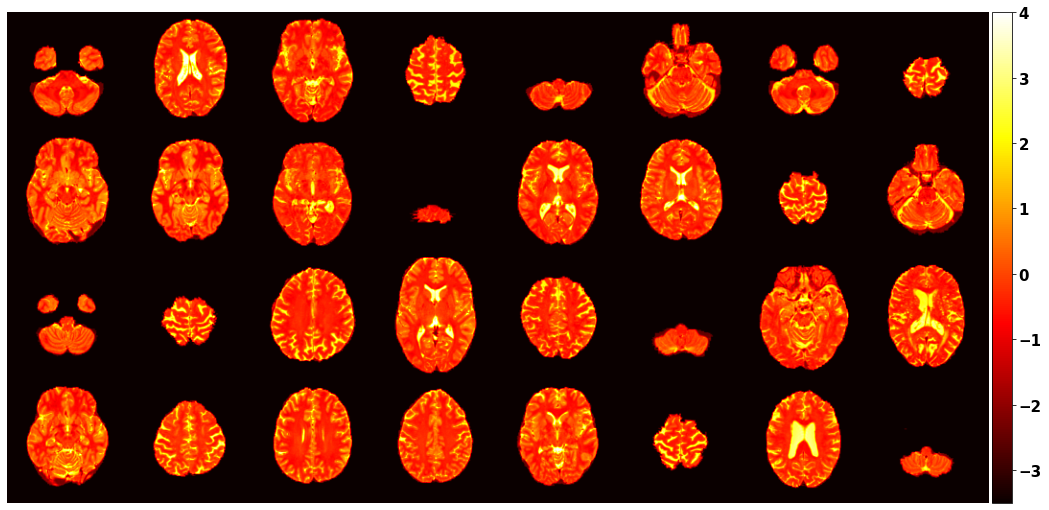

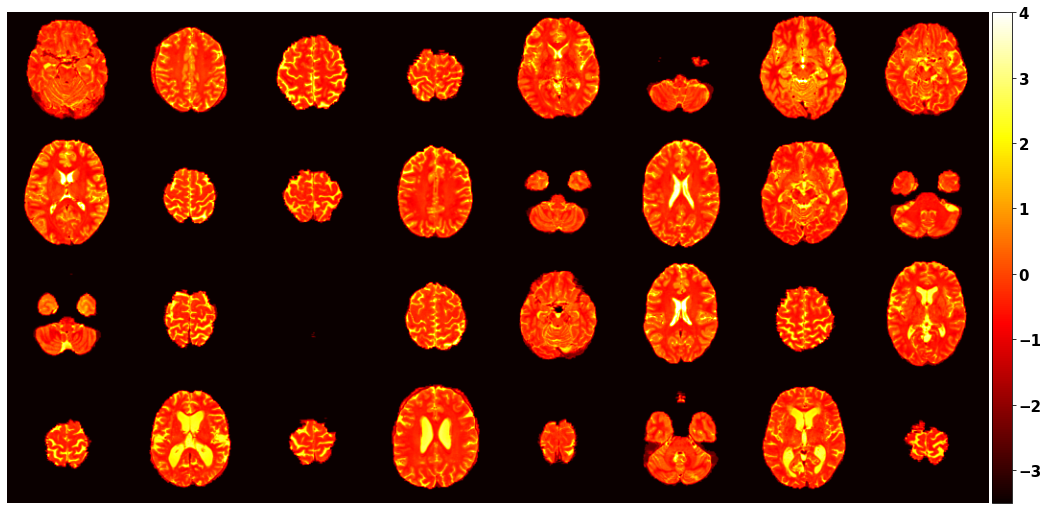

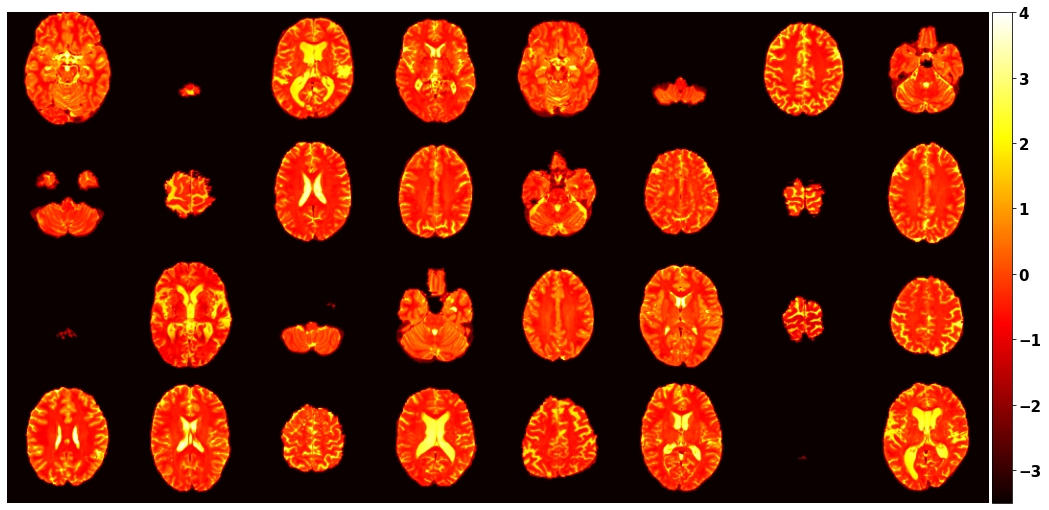

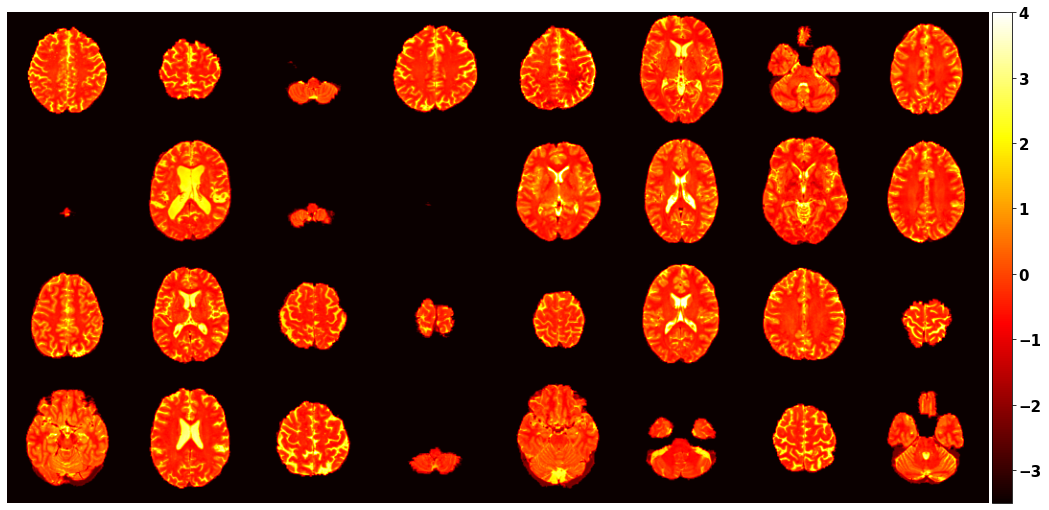

2020-11-30 16:19:16,542 : uncertify.visualization.datasets : INFO       Plotting CamCAN Dataset [scan only]


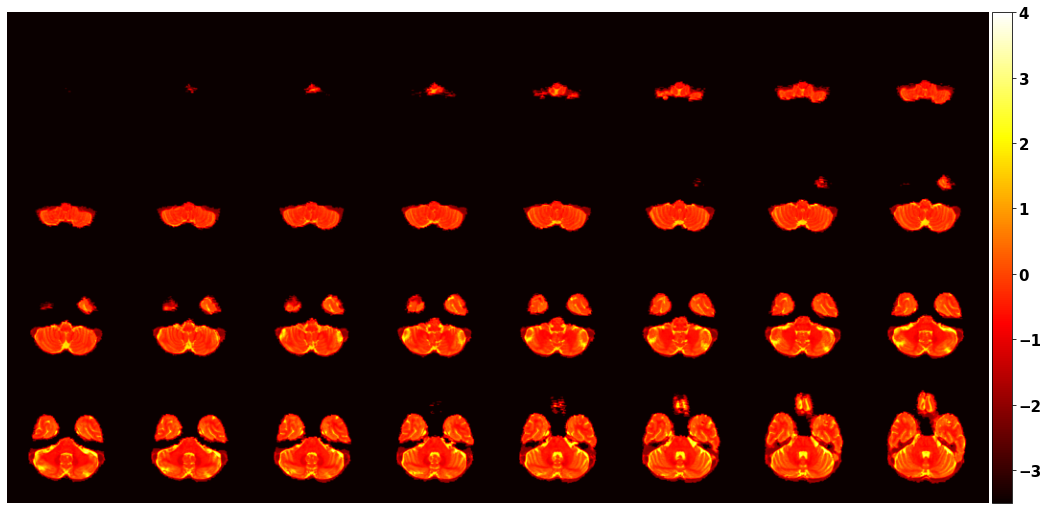

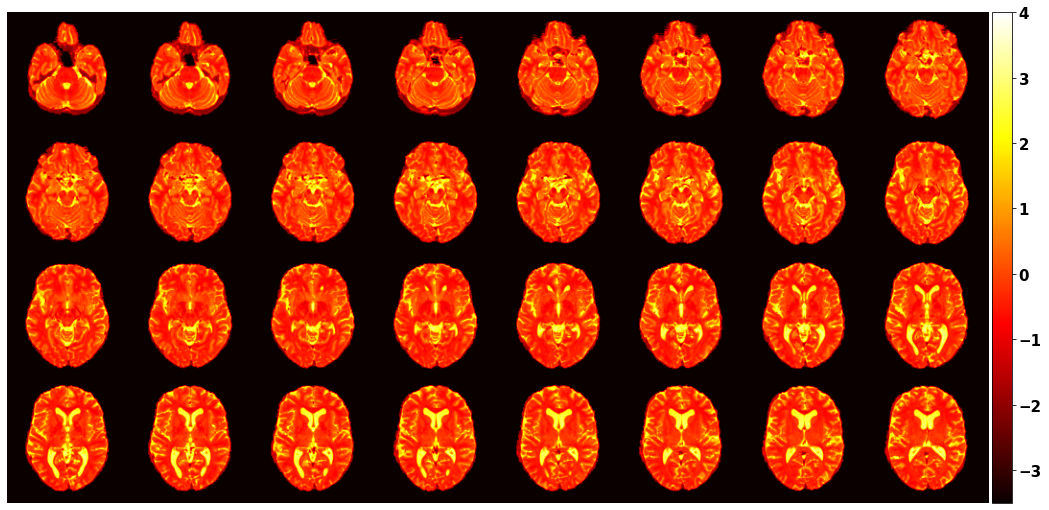

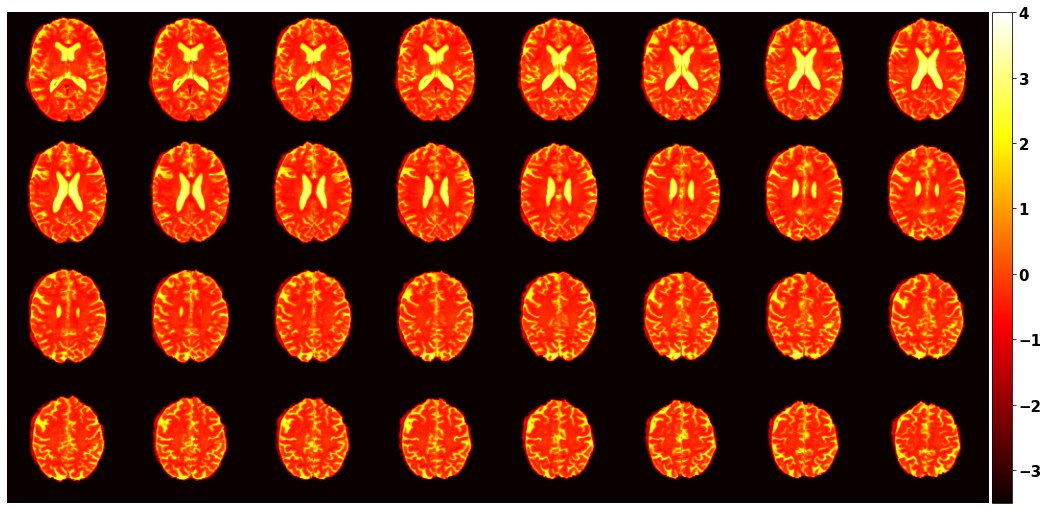

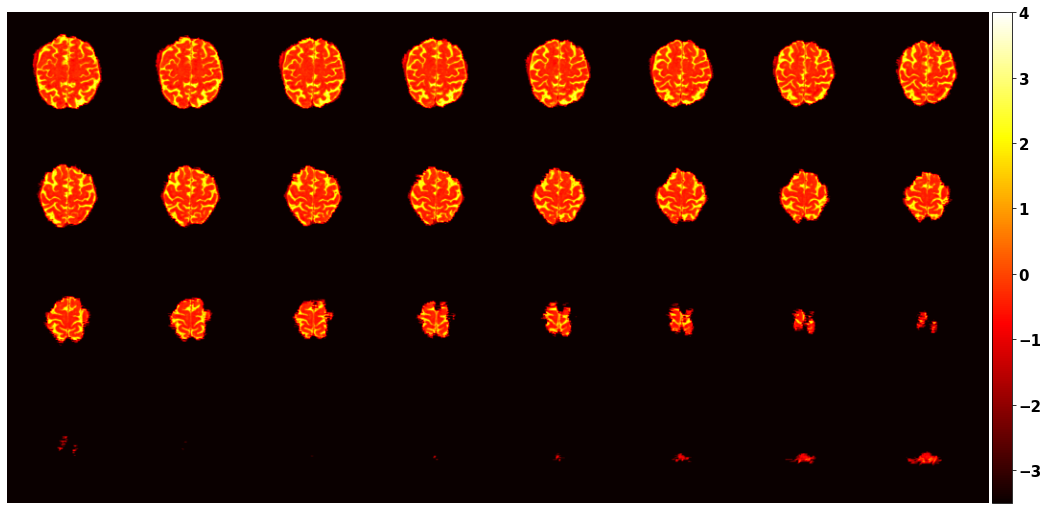

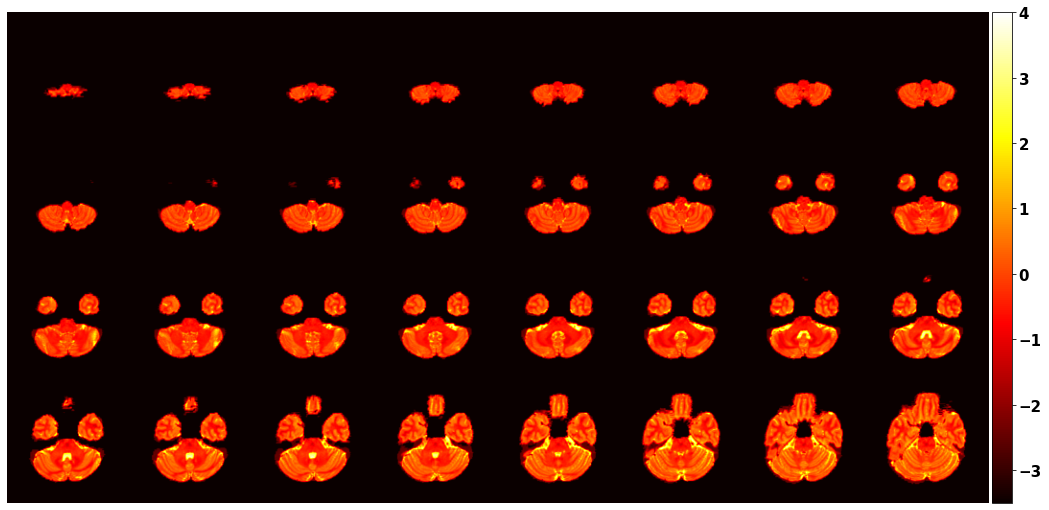

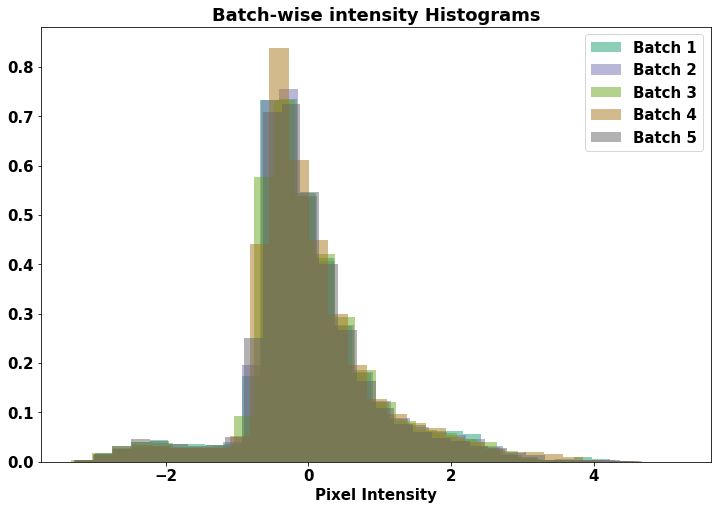

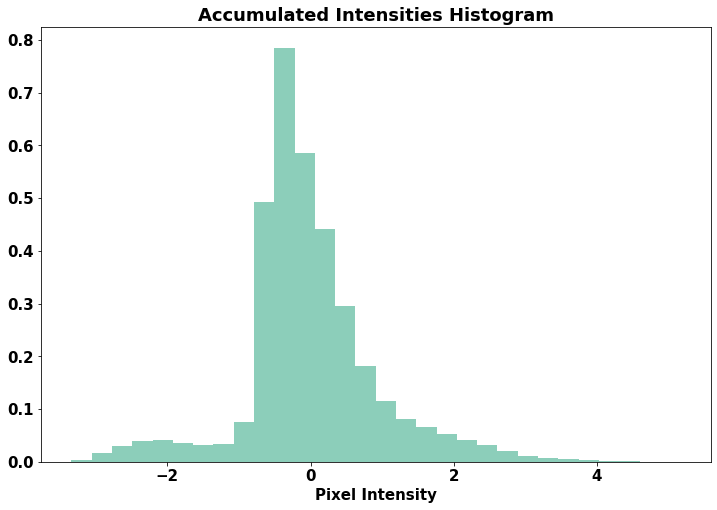

In [7]:
batch_size = 32
plot_n_batches = 5
nrow=8

camcan_train_dataloader, camcan_val_dataloader  = dataloader_factory(DatasetType.CAMCAN, batch_size=batch_size, 
                                                                     train_set_path=camcan_train_path, val_set_path=camcan_val_path, shuffle_train=True)

plot_camcan_batches(camcan_train_dataloader, plot_n_batches, cmap='hot', figsize=(18, 12), nrow=nrow, vmin=-3.5, vmax=4)
plot_camcan_batches(camcan_val_dataloader, plot_n_batches, cmap='hot', figsize=(18, 12), nrow=nrow, vmin=-3.5, vmax=4)

plot_patient_histograms(camcan_train_dataloader, n_batches=plot_n_batches, accumulate_batches=False, bins=30)
plot_patient_histograms(camcan_train_dataloader, n_batches=20, accumulate_batches=True, bins=30)

### Visualize BraTS Validation Data

In [ ]:
batch_size = 155
plot_n_batches = 2
nrow=32

HDD_PROCESSED_DIR_PATH = Path('/media/juniors/2TB_internal_HD/datasets/processed/')
_, brats_val_dataloader = dataloader_factory(DatasetType.BRATS17, batch_size=batch_size, 
                                             val_set_path=brats_t2_path, shuffle_val=False)

plot_brats_batches(brats_val_dataloader, plot_n_batches, cmap='hot', figsize=(18, 12), nrow=nrow, vmin=-3.5, vmax=4)

plot_patient_histograms(brats_val_dataloader, n_batches=plot_n_batches, accumulate_batches=False, bins=30)
plot_patient_histograms(brats_val_dataloader, n_batches=20, accumulate_batches=True, bins=30)

# Analyze normal / abnormal pixel distribution

In [ ]:
from uncertify.evaluation.datasets import get_samples_without_lesions
from uncertify.visualization.datasets import plot_fraction_of_abnormal_pixels
from uncertify.visualization.datasets import plot_abnormal_pixel_distribution
from uncertify.visualization.datasets import boxplot_abnormal_pixel_fraction

In [ ]:
fig, _ = plot_abnormal_pixel_distribution(brats_val_dataloader, figsize=(12, 5), 
                                          hist_kwargs=dict(bins=30, density=True))
fig.savefig(DATA_DIR_PATH / 'plots' / 'normal_abnormal_n_pixel_distribution.png')

In [ ]:
fig, _ = plot_fraction_of_abnormal_pixels(brats_val_dataloader, figsize=(12, 5), 
                                          hist_kwargs=dict(bins=80, density=True))
fig.savefig(DATA_DIR_PATH / 'plots' / 'abnormal_pixel_fraction.png')

In [ ]:
fig, ax = boxplot_abnormal_pixel_fraction(data_loader=brats_val_dataloader, figsize=(2.5, 5))
fig.savefig(DATA_DIR_PATH / 'plots' / 'boxplot_abnormal_pixel_fraction.png')

In [ ]:
n_samples_without_lesions, n_higher_ratio_threshold, n_samples_total = get_samples_without_lesions(brats_val_dataloader, pixel_ratio_threshold=0.01)
print(f'{n_samples_without_lesions} / {n_samples_total} samples have lesional pixels. {n_higher_ratio_threshold} / {n_samples_total} to have more than 0.01% of lesional pixels within the brain mask.')